In [30]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime, timedelta
import pytz
from pytz import timezone
from pandas.io import sql
import pymysql.cursors

import numpy
from numpy import mean

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

###### Please find below questions related to "success" part of the study

- How does tracking food and a users weight relate to each other ?
- Can you find any meaningful patterns or relationships?
- How does tracking food lead to reach the goal weight ? 

In [31]:
#Importing all datasets (all of operations are detailled in notebooks from directory called "exploring")

#users with complete timezone
users_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/users_timezone.csv',error_bad_lines=False)

#food
food_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/food.csv',error_bad_lines=False)

#exercise
ex_df = pd.read_csv('/Users/kevenlemoing/Sites/lifesum_assignement/data/exercise.csv',error_bad_lines=False)

#weight
weight_df = pd.read_csv('/Users/kevenlemoing/Sites/lifesum_assignement/data/weight.csv',error_bad_lines=False)

In [32]:
# Get the occurencies for each user
user_weight_tracking = weight_df.groupby('user_id').user_id.count()
user_weight_tracking

user_id
23296601     1
23297001     1
23297201     1
23297601     3
23297801     1
23298201     1
23299201     1
23299401     1
23299601     1
23299801     1
23300001     1
23300201     1
23300401     4
23300601     1
23300801     1
23301001     1
23301201     1
23301601     1
23301801     4
23302201     1
23302601     7
23302801     1
23303201     1
23303801     1
23304201     2
23304401     1
23304601     1
23305201     1
23305401     1
23305601     5
            ..
25100001     1
25100201     2
25100601     1
25100801     1
25101001     5
25101401     6
25102001     5
25102201     1
25102401     1
25102601     2
25102801     1
25104401     1
25104801     1
25105001     1
25105401    43
25105601     1
25106201     1
25106401     1
25107001     5
25107201     1
25107601     1
25107801     1
25108001     3
25108401     1
25109201     1
25109401     1
25111001     5
25111401     1
25111601     2
25111801     1
Name: user_id, dtype: int64

In [4]:
type(user_weight_tracking)

pandas.core.series.Series

In [33]:
user_weight_tracking_df = pd.Series.to_frame(user_weight_tracking)
user_weight_tracking_df['occurencies'] = user_weight_tracking_df['user_id']
user_weight_tracking_df['user_id'] = user_weight_tracking_df.index
user_weight_tracking_df = user_weight_tracking_df.reset_index(drop=True)
user_weight_tracking_df

,user_id,occurencies
0,23296601,1
1,23297001,1
2,23297201,1
3,23297601,3
4,23297801,1
5,23298201,1
6,23299201,1
7,23299401,1
8,23299601,1
9,23299801,1


In [34]:
print (max(user_weight_tracking_df['occurencies']))
print (mean(user_weight_tracking_df['occurencies']))

128
2.05363168176


In [35]:
#Getting "best" tracker user_id to analyse their weight evolution

good_tracker = []
for i in range(len(user_weight_tracking_df['user_id'])):
    
    if user_weight_tracking_df['occurencies'][i] > 50:
        print "This user id is good tracker {}".format(user_weight_tracking_df['user_id'][i])
        good_tracker.append(user_weight_tracking_df['user_id'][i])
        
len(good_tracker)

This user id is good tracker 23546401
This user id is good tracker 23564401
This user id is good tracker 24324601
This user id is good tracker 24481201
This user id is good tracker 24597001
This user id is good tracker 24622001
This user id is good tracker 24798201


7

In [36]:
#24798201 --> the best meal tracker
#25111601 --> an average meal tracker 

weight2_df = weight_df.copy()
weight2_df = weight2_df.loc[(weight2_df['user_id'].isin(good_tracker))]
weight2_df = weight2_df.reset_index(drop=True)
weight2_df

,user_id,date,weight_kg
0,24324601,2017-09-02,81.0
1,24597001,2017-09-02,89.7
2,24622001,2017-09-03,68.0
3,23564401,2017-09-03,52.9
4,24597001,2017-09-03,88.9
5,23564401,2017-09-04,52.4
6,23564401,2017-09-05,52.9
7,23564401,2017-09-07,53.0
8,24597001,2017-09-08,88.3
9,24324601,2017-09-09,79.8


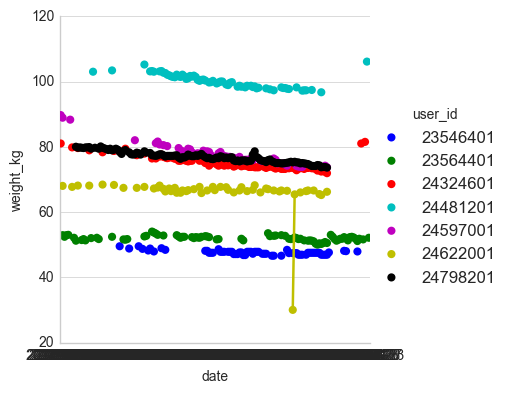

In [37]:
#Comparison of this two user types
sns.factorplot(x="date", y="weight_kg", hue="user_id", data=weight2_df)